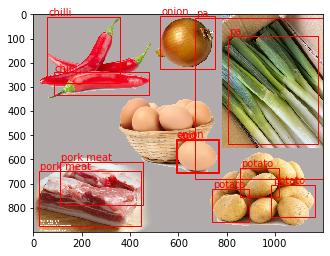

In [19]:
import torch
import torchvision
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from torchvision import transforms
from detecto import core, utils, visualize
# from detecto.utils import reverse_normalize, normalize_transform, _is_iterable

labels = ['chilli', 'egg', 'pork meat', 'potato', 'pa', 'onion']
model = core.Model.load('ingredients_weights_ver01_0326.pth', labels)

image = utils.read_image('test/test_image_02.jpg') # prediction할 이미지의 경로 입력
predictions = model.predict(image)
labels, boxes, scores = predictions
visualize.show_labeled_image(image, boxes, labels)

In [25]:
def show_labeled_image(image, boxes, labels=None):
    """Show the image along with the specified boxes around detected objects.
    Also displays each box's label if a list of labels is provided.
    :param image: The image to plot. If the image is a normalized
        torch.Tensor object, it will automatically be reverse-normalized
        and converted to a PIL image for plotting.
    :type image: numpy.ndarray or torch.Tensor
    :param boxes: A torch tensor of size (N, 4) where N is the number
        of boxes to plot, or simply size 4 if N is 1.
    :type boxes: torch.Tensor
    :param labels: (Optional) A list of size N giving the labels of
            each box (labels[i] corresponds to boxes[i]). Defaults to None.
    :type labels: torch.Tensor or None
    **Example**::
        >>> from detecto.core import Model
        >>> from detecto.utils import read_image
        >>> from detecto.visualize import show_labeled_image
        >>> model = Model.load('model_weights.pth', ['tick', 'gate'])
        >>> image = read_image('image.jpg')
        >>> labels, boxes, scores = model.predict(image)
        >>> show_labeled_image(image, boxes, labels)
    """

    fig, ax = plt.subplots(1)
    # If the image is already a tensor, convert it back to a PILImage
    # and reverse normalize it
    if isinstance(image, torch.Tensor):
        image = reverse_normalize(image)
        image = transforms.ToPILImage()(image)
    ax.imshow(image)

    # Show a single box or multiple if provided
    if boxes.ndim == 1:
        boxes = boxes.view(1, 4)

    if labels is not None and not utils._is_iterable(labels):
        labels = [labels]

    # Plot each box
    for i in range(boxes.shape[0]):
        box = boxes[i]
        width, height = (box[2] - box[0]).item(), (box[3] - box[1]).item()
        initial_pos = (box[0].item(), box[1].item())
        rect = patches.Rectangle(initial_pos,  width, height, linewidth=1,
                                 edgecolor='r', facecolor='none')
        if labels:
            ax.text(box[0] + 5, box[1] - 5, '{}'.format(labels[i]), color='red')

        ax.add_patch(rect)

    plt.show()
    fig.savefig('result.png')
    plt.close(fig)

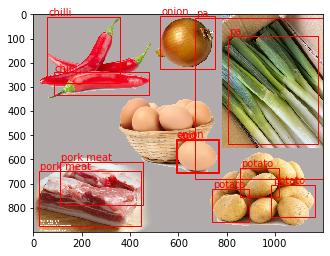

In [26]:
show_labeled_image(image, boxes, labels)

In [29]:
detection_class=list(set(labels))
detection_class

['onion', 'pa', 'pork meat', 'potato', 'chilli', 'egg']

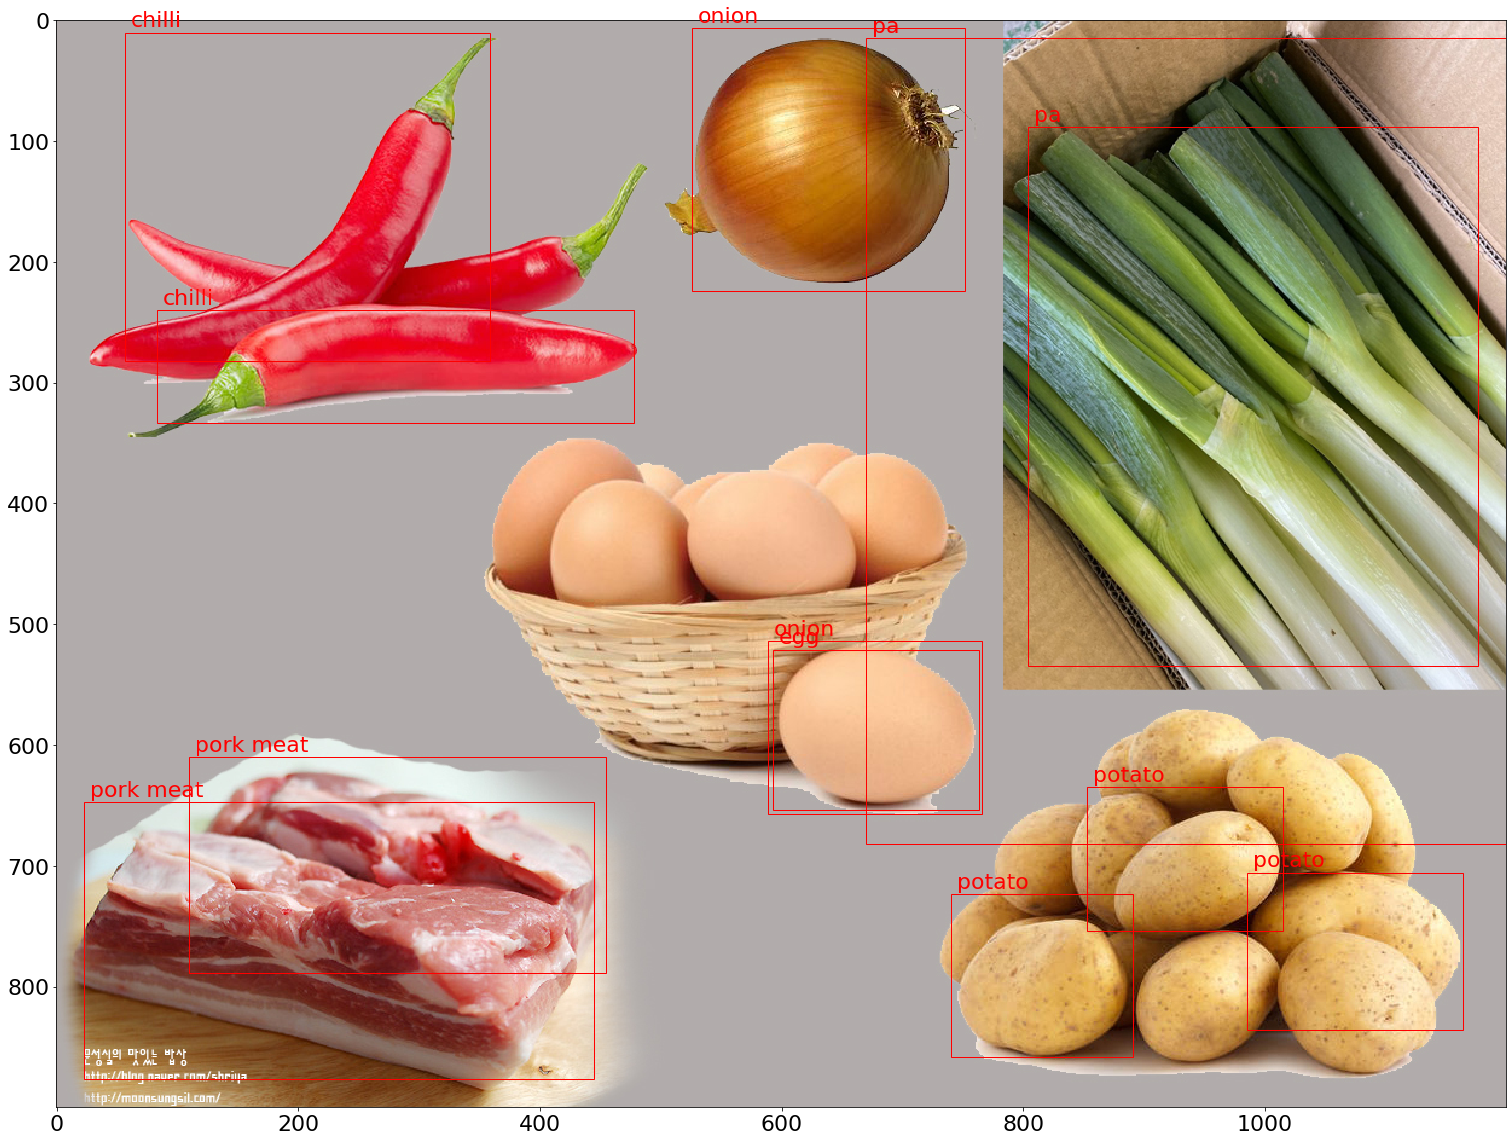

In [33]:
import torch
import torchvision
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from torchvision import transforms
from detecto import core, utils, visualize


def show_labeled_image(image, boxes, labels=None):    

    fig, ax = plt.subplots(1)
    plt.rcParams.update({'font.size': 22})
    fig.set_size_inches(30, 20)
    
    # If the image is already a tensor, convert it back to a PILImage
    # and reverse normalize it
    if isinstance(image, torch.Tensor):
        image = reverse_normalize(image)
        image = transforms.ToPILImage()(image)
    ax.imshow(image)

    # Show a single box or multiple if provided
    if boxes.ndim == 1:
        boxes = boxes.view(1, 4)

    if labels is not None and not utils._is_iterable(labels):
        labels = [labels]

    # Plot each box
    for i in range(boxes.shape[0]):
        box = boxes[i]
        width, height = (box[2] - box[0]).item(), (box[3] - box[1]).item()
        initial_pos = (box[0].item(), box[1].item())
        rect = patches.Rectangle(initial_pos,  width, height, linewidth=1,
                                 edgecolor='r', facecolor='none')
        if labels:
            ax.text(box[0] + 5, box[1] - 5, '{}'.format(labels[i]), color='red')

        ax.add_patch(rect)

    plt.show()    
    fig.savefig('test2png.png', dpi=100)
#     fig.savefig('result.png')
    plt.close(fig)

labels = ['chilli', 'egg', 'pork meat', 'potato', 'pa', 'onion']
model = core.Model.load('ingredients_weights_ver01_0326.pth', labels)

image = utils.read_image('test/test_image_02.jpg') # prediction할 이미지의 경로 입력해야함
predictions = model.predict(image)
labels, boxes, scores = predictions

## 'result.png'로 저장됨
show_labeled_image(image, boxes, labels)
# 이미지에서 검출된 label 정보(list type)
detection_class=list(set(labels))